In [6]:
# imports
import numpy as np
from scipy.integrate import ode

In [7]:
def newton(t, Y, q, m, B):
    """Computes the derivative of the state vector y according to the equation of motion:
    Y is the state vector (x, y, z, u, v, w) === (position, velocity).
    returns dY/dt.
    """
    x, y, z = Y[0], Y[1], Y[2]
    u, v, w = Y[3], Y[4], Y[5]
    
    alpha = q / m * B
    return np.array([u, v, w, 0, alpha * w, -alpha * v])

In [8]:
r = ode(newton).set_integrator('dopri5')

In [9]:
t0 = 0
x0 = np.array([0, 0, 0])
v0 = np.array([1, 1, 0])
initial_conditions = np.concatenate((x0, v0))

In [22]:
r.set_initial_value(initial_conditions, t0).set_f_params(1.0, 1.0, 1.0)

positions = []
dt = 2
t1 = 50
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    positions.append(r.y[:3]) # keeping only position, not velocity
#     print(r.y)

positions = np.array(positions)

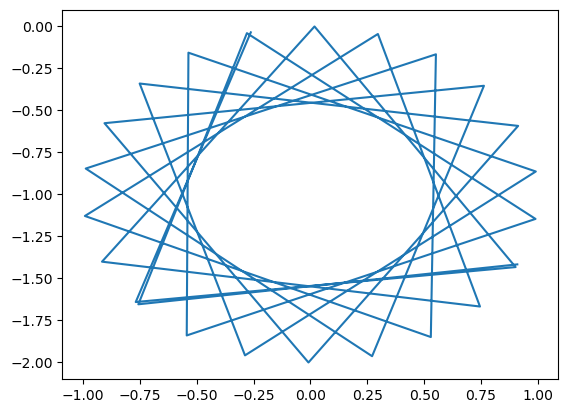

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(positions[:, 1], positions[:, 2])